In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Load dataset from CSV
file_path = 'data.csv'  # Update this to your actual file path
df = pd.read_csv(file_path)

In [3]:
df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,0,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,160.0,Mobile
1,20001,1,0.0,1.0,8.0,UPI,1,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,121.0,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,1,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,NaN,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,1,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,1,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,130.0,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10.0,1.0,34.0,Credit Card,1,3.0,2.0,Super,1.0,Married,9.0,0.0,19.0,1.0,4.0,154.0,Computer
11256,31256,0,13.0,1.0,19.0,Credit Card,1,3.0,5.0,HNI,5.0,Married,7.0,0.0,16.0,1.0,8.0,227.0,Mobile
11257,31257,0,1.0,1.0,14.0,Debit Card,1,3.0,2.0,Super,4.0,Married,7.0,1.0,22.0,1.0,4.0,191.0,Mobile
11258,31258,0,23.0,3.0,11.0,Credit Card,1,4.0,5.0,Super,4.0,Married,7.0,0.0,16.0,2.0,9.0,180.0,Computer


In [4]:
df.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.00000,11260.000000,11042.000000,11148.000000,11158.000000,11260.000000,11162.000000,10816.000000,11144.000000,10469.000000,10903.000000,11257.000000,11257.000000,10902.000000,10787.000000
mean,25629.50000,0.168384,11.025086,1.653929,17.867091,0.595382,2.902526,3.692862,3.066493,6.362594,0.285334,16.193391,1.790619,4.633187,196.235376
std,3250.62635,0.374223,12.879782,0.915015,8.853269,0.490840,0.725584,1.022976,1.379772,11.909686,0.451594,3.757721,1.969551,3.697637,178.656881
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,0.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.000000
50%,25629.50000,0.000000,9.000000,1.000000,16.000000,1.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,165.000000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,1.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,8.000000,200.000000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,1.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11260 non-null  int64  
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
 df.isna().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                       0
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

In [7]:
# Calculating the percentage of missing values in each column
percentage_missing = df.isna().sum() / len(df) * 100
print("Percentage of Missing Data: ")
print(percentage_missing)

Percentage of Missing Data: 
AccountID                  0.000000
Churn                      0.000000
Tenure                     1.936057
City_Tier                  0.994671
CC_Contacted_LY            0.905861
Payment                    0.968028
Gender                     0.000000
Service_Score              0.870337
Account_user_count         3.943162
account_segment            0.861456
CC_Agent_Score             1.030195
Marital_Status             1.882771
rev_per_month              7.024867
Complain_ly                3.170515
rev_growth_yoy             0.026643
coupon_used_for_payment    0.026643
Day_Since_CC_connect       3.179396
cashback                   4.200710
Login_device               1.962700
dtype: float64


<AxesSubplot:>

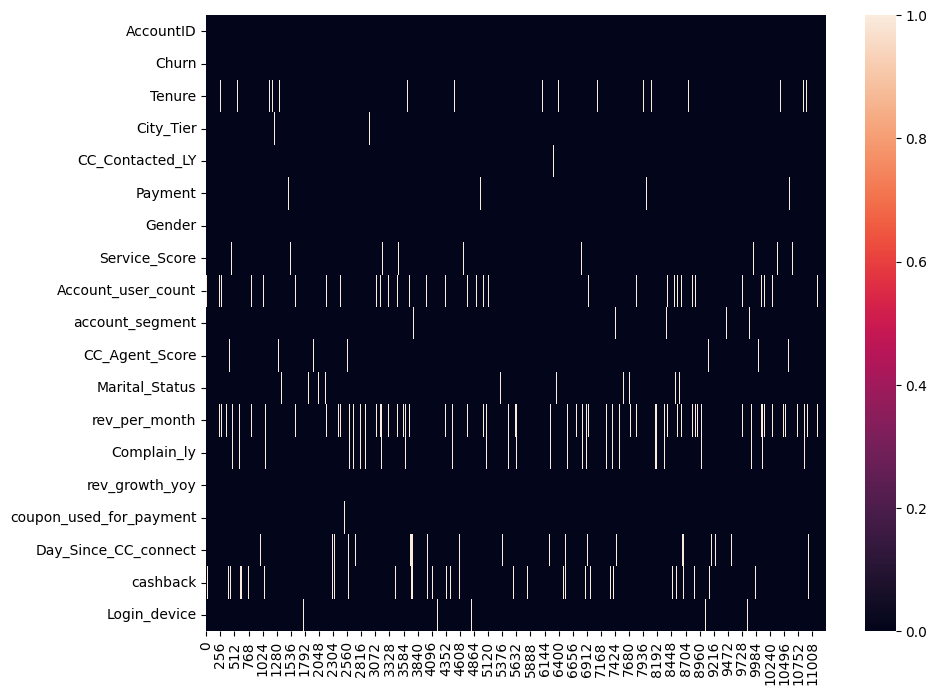

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isna().transpose())

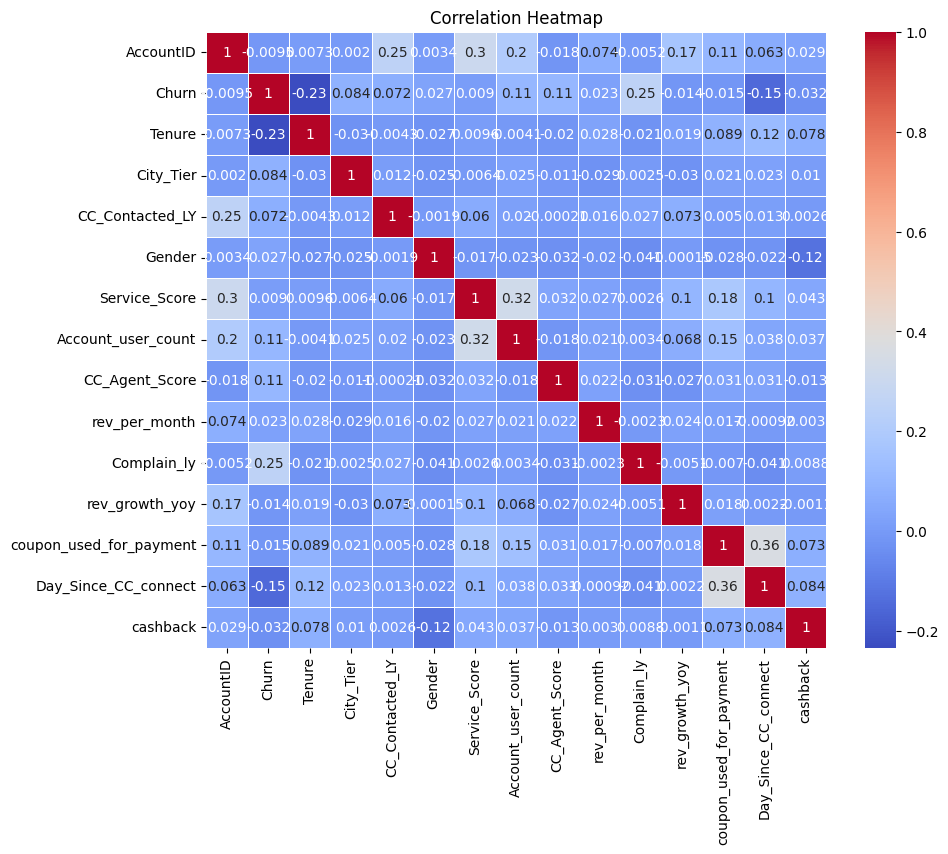

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Handle missing values and invalid entries
# Example: Replace invalid entry '&&&&' with NaN
df.replace('&&&&', pd.NA, inplace=True)
df.replace('#', pd.NA, inplace=True)
df.replace('@', pd.NA, inplace=True)
df.replace('+', pd.NA, inplace=True)
df.replace('$', pd.NA, inplace=True)
df.replace('*', pd.NA, inplace=True)

In [11]:
# Drop rows with NaN values (you can also fill them using .fillna())
df.dropna(inplace=True)

In [12]:
 df.isna().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [13]:
df.corr()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
AccountID,1.000000,-0.015008,0.009076,0.007704,0.244642,-0.001081,0.306037,0.218432,-0.025386,0.063222,-0.018226,0.173571,0.117642,0.056060,0.025719
Churn,-0.015008,1.000000,-0.215064,0.090481,0.066927,0.035552,0.005362,0.097179,0.095363,0.023023,0.261321,-0.026874,-0.013387,-0.145813,-0.026434
Tenure,0.009076,-0.215064,1.000000,-0.030011,0.002143,-0.024210,0.016449,0.001724,-0.016669,0.021030,-0.027887,0.018766,0.082598,0.113581,0.062335
City_Tier,0.007704,0.090481,-0.030011,1.000000,0.018295,-0.025806,-0.013244,0.030845,-0.007932,-0.029697,0.012288,-0.021906,0.019762,0.022056,0.006940
CC_Contacted_LY,0.244642,0.066927,0.002143,0.018295,1.000000,0.006868,0.052256,0.016068,-0.010791,0.012679,0.020214,0.073255,0.003126,0.011984,0.002216
Gender,-0.001081,0.035552,-0.024210,-0.025806,0.006868,1.000000,-0.016691,-0.025272,-0.024110,-0.021282,-0.041167,0.000716,-0.020129,-0.020727,-0.141223
Service_Score,0.306037,0.005362,0.016449,-0.013244,0.052256,-0.016691,1.000000,0.329864,0.030113,0.022412,0.001372,0.108082,0.189134,0.095797,0.040749
Account_user_count,0.218432,0.097179,0.001724,0.030845,0.016068,-0.025272,0.329864,1.000000,-0.017348,0.019751,-0.002652,0.079054,0.143461,0.033714,0.034137
CC_Agent_Score,-0.025386,0.095363,-0.016669,-0.007932,-0.010791,-0.024110,0.030113,-0.017348,1.000000,0.020480,-0.032134,-0.040082,0.039347,0.035339,-0.014617
rev_per_month,0.063222,0.023023,0.021030,-0.029697,0.012679,-0.021282,0.022412,0.019751,0.020480,1.000000,-0.001485,0.026599,0.016246,0.000112,-0.000917


In [14]:
# Drop the 'AccountID' column (or any other unique identifier that shouldn't be in training)
if 'AccountID' in df.columns:
    df.drop('AccountID', axis=1, inplace=True)

In [15]:
df.corr()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
Churn,1.000000,-0.215064,0.090481,0.066927,0.035552,0.005362,0.097179,0.095363,0.023023,0.261321,-0.026874,-0.013387,-0.145813,-0.026434
Tenure,-0.215064,1.000000,-0.030011,0.002143,-0.024210,0.016449,0.001724,-0.016669,0.021030,-0.027887,0.018766,0.082598,0.113581,0.062335
City_Tier,0.090481,-0.030011,1.000000,0.018295,-0.025806,-0.013244,0.030845,-0.007932,-0.029697,0.012288,-0.021906,0.019762,0.022056,0.006940
CC_Contacted_LY,0.066927,0.002143,0.018295,1.000000,0.006868,0.052256,0.016068,-0.010791,0.012679,0.020214,0.073255,0.003126,0.011984,0.002216
Gender,0.035552,-0.024210,-0.025806,0.006868,1.000000,-0.016691,-0.025272,-0.024110,-0.021282,-0.041167,0.000716,-0.020129,-0.020727,-0.141223
Service_Score,0.005362,0.016449,-0.013244,0.052256,-0.016691,1.000000,0.329864,0.030113,0.022412,0.001372,0.108082,0.189134,0.095797,0.040749
Account_user_count,0.097179,0.001724,0.030845,0.016068,-0.025272,0.329864,1.000000,-0.017348,0.019751,-0.002652,0.079054,0.143461,0.033714,0.034137
CC_Agent_Score,0.095363,-0.016669,-0.007932,-0.010791,-0.024110,0.030113,-0.017348,1.000000,0.020480,-0.032134,-0.040082,0.039347,0.035339,-0.014617
rev_per_month,0.023023,0.021030,-0.029697,0.012679,-0.021282,0.022412,0.019751,0.020480,1.000000,-0.001485,0.026599,0.016246,0.000112,-0.000917
Complain_ly,0.261321,-0.027887,0.012288,0.020214,-0.041167,0.001372,-0.002652,-0.032134,-0.001485,1.000000,-0.009312,0.000997,-0.037350,0.010387


In [16]:
# Handling missing values using the filena method
# For numerical columns: fill missing values with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [17]:
# For categorical columns: fill missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [18]:
exclude_columns = ['Tenure', 'Gender']
label_encodings = {}
label_encoded_cols = []

# Apply Label Encoding to categorical columns except 'Tenure' and 'Gender'
for col in categorical_cols:
    if col not in exclude_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encodings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
        label_encoded_cols.append(col)

In [19]:
# Save the label encodings (original to encoded mapping) in a text file
label_encodings_file = 'label_encodings.txt'
with open(label_encodings_file, 'w') as f:
    for col, mapping in label_encodings.items():
        f.write(f'{col}:\n')
        for original, encoded in mapping.items():
            f.write(f'  {original} -> {encoded}\n')
        f.write('\n')

In [20]:
# Separate features and target
print(df.columns)
if 'Churn' in df.columns:
    X = df.drop('Churn', axis=1)
    y = df['Churn']
else:
    raise ValueError("Target column 'Churn' not found in the dataset.")

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')


In [21]:
# Split data into training and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size = 0.2,random_state =2)

In [22]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  88.45693779904306
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1381
           1       0.73      0.54      0.62       291

    accuracy                           0.88      1672
   macro avg       0.82      0.75      0.78      1672
weighted avg       0.88      0.88      0.88      1672



In [24]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.88815789, 0.88696172, 0.89886296, 0.90305206, 0.89766607])

In [25]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.8397129186602871
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1381
           1       0.60      0.24      0.35       291

    accuracy                           0.84      1672
   macro avg       0.73      0.60      0.63      1672
weighted avg       0.81      0.84      0.81      1672



In [27]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,X,y,cv=5)
score

array([0.84509569, 0.85406699, 0.85816876, 0.8491921 , 0.84799521])

In [28]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.8881578947368421
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1381
           1       0.82      0.45      0.59       291

    accuracy                           0.89      1672
   macro avg       0.86      0.72      0.76      1672
weighted avg       0.88      0.89      0.87      1672



In [30]:
# Cross validation score (SVM)
score = cross_val_score(SVM,X,y,cv=5)
score

array([0.8319378 , 0.83492823, 0.83482944, 0.834231  , 0.83123878])

In [31]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9617224880382775
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1381
           1       0.98      0.80      0.88       291

    accuracy                           0.96      1672
   macro avg       0.97      0.90      0.93      1672
weighted avg       0.96      0.96      0.96      1672



In [33]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,X,y,cv=5)
score

array([0.96411483, 0.97906699, 0.98204668, 0.97606224, 0.95751047])

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [35]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
                              
xgb.fit(Xtrain,Ytrain)

predicted_values = xgb.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('xgboost')
print("xgboost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

xgboost's Accuracy is:  0.9688995215311005
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1381
           1       0.94      0.87      0.91       291

    accuracy                           0.97      1672
   macro avg       0.96      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

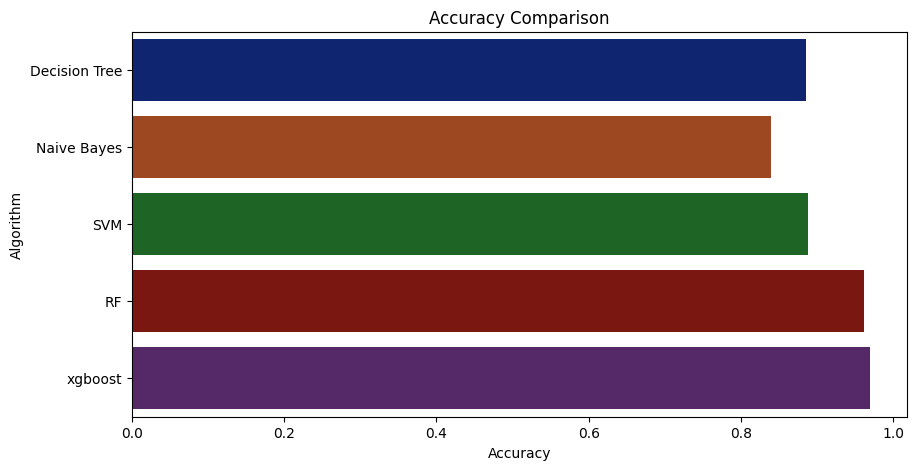

In [36]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [37]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (f"{k}-->{v*100:.2f} %")

Decision Tree-->88.46 %
Naive Bayes-->83.97 %
SVM-->88.82 %
RF-->96.17 %
xgboost-->96.89 %


In [38]:
data = np.array([[4,3,6,2,0,3,3,3,2,2,9,1,11,1,5,160,1]])
prediction = RF.predict(data)[0]
print(prediction)
if prediction ==1:
    print("Churn")
else:
    print("No Churn")

1
Churn


In [39]:
data = np.array([[13,3,10,3,1,3,4,0,2,0,8,0,11,2,11,209,1]])
prediction = RF.predict(data)[0]
print(prediction)
if prediction ==1:
    print("Churn")
else:
    print("No Churn")

0
No Churn


In [40]:
X.to_csv("processed.csv")

In [41]:
df.to_csv("processed_dataset.csv")